In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [57]:
K1 = 5
w_s = 376.9911
K2 = 10
K3 = 1.7

In [58]:
# good_freqs = [2, 4, 6, 173, 175, 177, 180, 182, 184]
num_freqs = 185  # You can change the number of frequencies used in the model


In [59]:
def f(t,freqs,coef,a0):

    in_sigma = coef*(np.e**(-t)*np.sin(freqs*t))
    return np.sum(in_sigma)+a0

In [60]:
# def f(t,freqs,coef,a0):
#     sum_sigma = 0
#     for i in freqs:
#         sum_sigma += coef[i-1]*np.e**(-1*t)*np.sin(i*t)

#     return sum_sigma+a0

In [61]:
def f_prime(t,freqs,coef,a0):
    in_sigma_part1 =-1*coef*(np.e**(-t)*np.sin(freqs*t))
    in_sigma_part2 =freqs*coef*(np.e**(-t)*np.cos(freqs*t))

    return np.sum(in_sigma_part1+in_sigma_part2)

In [62]:
# def f_prime(t,freqs,coef,a0):
#     sum_sigma = 0
#     for i in freqs:
#         sum_sigma += -1*coef[i-1]*np.e**(-1*t)*np.sin(i*t)+i*coef[i-1]*np.e**(-1*t)*np.cos(i*t)

#     return sum_sigma

In [63]:
def f_prime_fin(t,freqs,coef,a0,dt):
    t2 = t+dt
    t1 = t-dt
 
    f2 = f(t2,freqs,coef,a0)
    f1 = f(t1,freqs,coef,a0)
    diff = (f2-f1)/(2*dt)

    return diff

In [64]:
# def DE_1(t,dell,w,del_prime,w_prime):
#     global K1
#     global w_s
#     global K2
#     global K3

#     # return del_prime+(w_s-w)
#     # return w_prime-K1-K2*np.sin(dell)-K3*(-w_s+w)
#     # return w_prime-K1-K2*np.sin(dell)-K3*(-w_s+w)+del_prime+w_s-w

In [65]:
def DE_1(t,dell,w,del_prime,w_prime):
    global K1
    global w_s
    global K2
    global K3

    # return w_prime-K1-K2*np.sin(dell)-K3*(-w_s+w)
    # return w_prime-K1+K2*np.sin(dell)+K3*(-w_s+w)
    return -(w_s-w)
    return del_prime+(w_s-w)

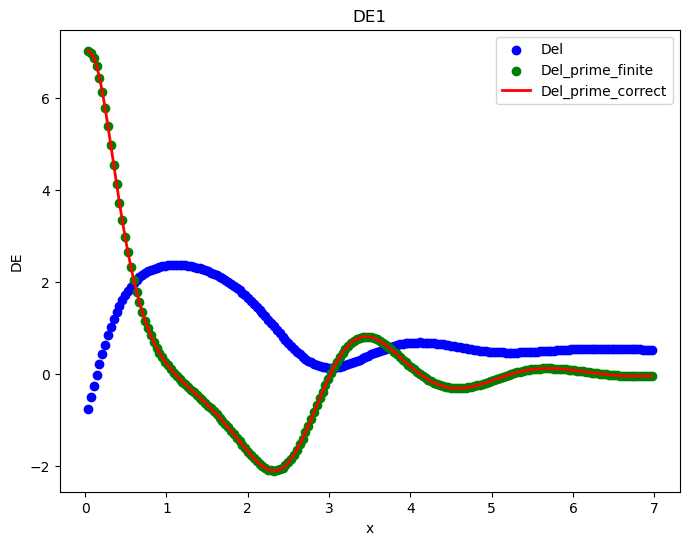

In [66]:
def create_features(x, num_freqs):
    # Generate features using different frequencies of e^(-x) * sin(wx)
    features = []
    for i in range(1, num_freqs):
        features.append(np.exp(-x) * np.sin(i * x))
        

    # for i in good_freqs:
    #     features.append(i*np.exp(-x) * np.sin(i * x))

    # Add a constant feature (constant term)
    features.append(np.ones_like(x))
   
    return np.vstack(features).T

def fit_function_with_ml(x, y, num_freqs):
    # Create features from data points
    X = create_features(x, num_freqs)
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    return model

def plot_fit_results(x, y, model, num_freqs):
    # Create features from data points for plotting
    X = create_features(x, num_freqs)
    
    # Make predictions using the fitted model
    y_pred = model.predict(X)
    
    # Plot the original data points and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label='Data Points', color='blue')
    plt.plot(x, y_pred, label='Fitted Curve', color='red', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Function Fitting with Different Frequencies')
    plt.legend()
    plt.show()

def plot_f_results_analytic(x, y, freqs,coefs,a0):

    y_calculated = [f(t,freqs,coefs,a0) for t in x]
    
    # Plot the original data points and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label='Data Points', color='blue')
    plt.plot(x, y_calculated, label='y_calculated Curve', color='red', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Function with Different Frequencies')
    plt.legend()
    plt.show()


def plot_f_f_prime_results_analytic(x, y, freqs,coefs,a0):
    
    y_calculated = [f(t,freqs,coefs,a0) for t in x]
    y_prime_calculated = [f_prime_fin(t,freqs,coefs,a0,dt=x[1]) for t in x]

    # Plot the original data points and the fitted curve
    plt.figure(figsize=(8, 6))
    # plt.scatter(x, y_calculated, label='F', color='blue')
    plt.plot(x, y_prime_calculated, label='F_prime', color='red', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Function with Different Frequencies')
    plt.legend()
    plt.show()


def plot_DE(t, freqs_w,coefs_w,a0_w,freqs_del,coefs_del,a0_del):
    dt = t[1]
    t_new = t[1:-1]
    w_calculated = np.array([f(t,freqs_w,coefs_w,a0_w) for t in t_new])
    # w_prime_calculated = np.array([f_prime(t,freqs_w,coefs_w,a0_w) for t in t])
    w_prime_calculated = np.array([f_prime_fin(t,freqs_w,coefs_w,a0_w,dt=dt) for t in t_new])
    
    del_calculated = np.array([f(t,freqs_del,coefs_del,a0_del) for t in t_new])
    # del_prime_calculated = np.array([f_prime(t,freqs_del,coefs_del,a0_w) for t in t])
    del_prime_calculated = np.array([f_prime_fin(t,freqs_del,coefs_del,a0_w,dt=dt) for t in t_new])





    de_1 = DE_1(t_new,del_calculated,w_calculated,del_prime_calculated,w_prime_calculated)



    # Plot the original data points and the fitted curve
    plt.figure(figsize=(8, 6))
    plt.scatter(t_new, del_calculated, label='Del', color='blue')
    plt.scatter(t_new, del_prime_calculated, label='Del_prime_finite', color='green')
    plt.plot(t_new, de_1, label='Del_prime_correct', color='red', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('DE')
    plt.title('DE1')
    plt.legend()
    plt.show()

def main():
    global num_freqs
    # Input data points
    # x = np.array([0.0, 0.034482758620689655, 0.06896551724137931, 0.10344827586206896, 0.13793103448275862, 0.1724137931034483, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.3103448275862069, 0.3448275862068966, 0.3793103448275862, 0.41379310344827586, 0.4482758620689655, 0.4827586206896552, 0.5172413793103449, 0.5517241379310345, 0.5862068965517241, 0.6206896551724138, 0.6551724137931034, 0.6896551724137931, 0.7241379310344828, 0.7586206896551724, 0.7931034482758621, 0.8275862068965517, 0.8620689655172413, 0.896551724137931, 0.9310344827586207, 0.9655172413793104, 1.0])
    # y = np.array([383.9911, 384.01706751326924, 383.9828885247102, 383.8808125971688, 383.7084372056539, 383.4687638670096, 383.1696101373725, 382.8221351721135, 382.4394049518417, 382.03499070163184, 381.62150213890624, 381.2097329925458, 380.80859013730577, 380.4246713030564, 380.062383889052, 379.7245813646966, 379.4126024886706, 379.12660170864535, 378.8658653877571, 378.62924003544396, 378.41531030130216, 378.2223989750864, 378.0485689853088, 377.89187938330747, 377.75062031062566, 377.62313745605, 377.50784802000675, 377.4032407145614, 377.30787576341896, 377.2204251497879])
    
    x = np.array([0.0, 0.035175879396984924, 0.07035175879396985, 0.10552763819095477, 0.1407035175879397, 0.17587939698492464, 0.21105527638190955, 0.24623115577889448, 0.2814070351758794, 0.3165829145728643, 0.35175879396984927, 0.3869346733668342, 0.4221105527638191, 0.457286432160804, 0.49246231155778897, 0.5276381909547738, 0.5628140703517588, 0.5979899497487438, 0.6331658291457286, 0.6683417085427136, 0.7035175879396985, 0.7386934673366834, 0.7738693467336684, 0.8090452261306532, 0.8442211055276382, 0.8793969849246231, 0.914572864321608, 0.949748743718593, 0.9849246231155779, 1.020100502512563, 1.0552763819095476, 1.0904522613065326, 1.1256281407035176, 1.1608040201005025, 1.1959798994974875, 1.2311557788944723, 1.2663316582914572, 1.3015075376884422, 1.3366834170854272, 1.3718592964824121, 1.407035175879397, 1.4422110552763818, 1.4773869346733668, 1.5125628140703518, 1.5477386934673367, 1.5829145728643217, 1.6180904522613064, 1.6532663316582914, 1.6884422110552764, 1.7236180904522613, 1.7587939698492463, 1.7939698492462313, 1.829145728643216, 1.864321608040201, 1.899497487437186, 1.934673366834171, 1.9698492462311559, 2.0050251256281406, 2.040201005025126, 2.0753768844221105, 2.1105527638190953, 2.1457286432160805, 2.180904522613065, 2.2160804020100504, 2.251256281407035, 2.28643216080402, 2.321608040201005, 2.35678391959799, 2.391959798994975, 2.4271356783919598, 2.4623115577889445, 2.4974874371859297, 2.5326633165829144, 2.5678391959798996, 2.6030150753768844, 2.6381909547738696, 2.6733668341708543, 2.708542713567839, 2.7437185929648242, 2.778894472361809, 2.814070351758794, 2.849246231155779, 2.8844221105527637, 2.919597989949749, 2.9547738693467336, 2.9899497487437188, 3.0251256281407035, 3.0603015075376883, 3.0954773869346734, 3.130653266331658, 3.1658291457286434, 3.201005025125628, 3.236180904522613, 3.271356783919598, 3.306532663316583, 3.341708542713568, 3.3768844221105527, 3.4120603015075375, 3.4472361809045227, 3.4824120603015074, 3.5175879396984926, 3.5527638190954773, 3.5879396984924625, 3.6231155778894473, 3.658291457286432, 3.693467336683417, 3.728643216080402, 3.763819095477387, 3.798994974874372, 3.8341708542713566, 3.869346733668342, 3.9045226130653266, 3.9396984924623117, 3.9748743718592965, 4.010050251256281, 4.045226130653266, 4.080402010050252, 4.115577889447236, 4.150753768844221, 4.185929648241206, 4.221105527638191, 4.256281407035176, 4.291457286432161, 4.326633165829146, 4.36180904522613, 4.396984924623116, 4.432160804020101, 4.467336683417085, 4.50251256281407, 4.5376884422110555, 4.57286432160804, 4.608040201005025, 4.64321608040201, 4.678391959798995, 4.71356783919598, 4.748743718592965, 4.78391959798995, 4.819095477386934, 4.8542713567839195, 4.889447236180905, 4.924623115577889, 4.959798994974874, 4.994974874371859, 5.030150753768845, 5.065326633165829, 5.100502512562814, 5.135678391959799, 5.1708542713567835, 5.206030150753769, 5.241206030150754, 5.276381909547739, 5.311557788944723, 5.346733668341709, 5.381909547738694, 5.417085427135678, 5.452261306532663, 5.4874371859296485, 5.522613065326633, 5.557788944723618, 5.592964824120603, 5.628140703517588, 5.663316582914573, 5.698492462311558, 5.733668341708543, 5.768844221105527, 5.8040201005025125, 5.839195979899498, 5.874371859296482, 5.909547738693467, 5.944723618090452, 5.9798994974874375, 6.015075376884422, 6.050251256281407, 6.085427135678392, 6.1206030150753765, 6.155778894472362, 6.190954773869347, 6.226130653266332, 6.261306532663316, 6.296482412060302, 6.331658291457287, 6.366834170854271, 6.402010050251256, 6.437185929648241, 6.472361809045226, 6.507537688442211, 6.542713567839196, 6.577889447236181, 6.613065326633166, 6.648241206030151, 6.683417085427136, 6.71859296482412, 6.7537688442211055, 6.788944723618091, 6.824120603015075, 6.85929648241206, 6.894472361809045, 6.9296482412060305, 6.964824120603015, 7.0])
    y_w = np.array([383.9911, 384.0170070150686, 383.98012915336074, 383.8724057378855, 383.6915783828631, 383.4412203954212, 383.1300224130982, 382.77009857745577, 382.3754872340625, 381.9605214419208, 381.53828252348393, 381.11984881618673, 380.71421632403957, 380.32777295959966, 379.9647624192785, 379.627776334398, 379.31780658774034, 379.0347169000787, 378.77753709916834, 378.5449449513647, 378.33533466577876, 378.14681689427726, 377.97726718860235, 377.8247577134912, 377.6875004654012, 377.563775214581, 377.4519391682901, 377.350426970799, 377.2577574907331, 377.17266287801425, 377.09407040944393, 377.02097548903373, 376.9524367123104, 376.8875758663156, 376.8255779296064, 376.7656993693931, 376.707339036902, 376.64997374817403, 376.59311584389127, 376.5363146025764, 376.4791562405923, 376.42126391214254, 376.362297709271, 376.30196618897185, 376.24006727709786, 376.17641134786777, 376.110866034387, 376.04336387553394, 375.97390231595995, 375.90254370608915, 375.8294153021186, 375.7547092660185, 375.6786826655316, 375.6016682669019, 375.52419079694795, 375.44691487538466, 375.3705959583155, 375.29608032643705, 375.22430508503925, 375.1562981640052, 375.0931783178113, 375.0361551255271, 374.9865289908155, 374.94568869187367, 374.91462523670987, 374.8945848699762, 374.88698204987304, 374.89291898433515, 374.9131856310322, 374.94825969736814, 374.9983066404817, 375.0631796672462, 375.1424197342694, 375.235255547894, 375.3406035641969, 375.4572181197918, 375.58387894639185, 375.718831874356, 375.86029293217763, 376.0064838737802, 376.1556321785166, 376.3059710511696, 376.45573942195153, 376.60318194650455, 376.7466167949738, 376.8847648473669, 377.01622081194625, 377.1397188136637, 377.25419492357946, 377.3587871588623, 377.45283548278934, 377.5358818047462, 377.6076699802269, 377.66814581083395, 377.71731795242266, 377.75523582310313, 377.7821665036112, 377.7984851143123, 377.80467462540435, 377.80132585691774, 377.78913747871553, 377.76891601049334, 377.74155210246875, 377.707762171343, 377.6683864083572, 377.62429075586977, 377.5763039334509, 377.52521743788265, 377.4717855431589, 377.4167253004854, 377.3607165382796, 377.3044013949633, 377.24832068290516, 377.19300503639454, 377.13898197193595, 377.0867222935875, 377.0366400929607, 376.9890927492207, 376.94438092908615, 376.90274858682926, 376.8643829642758, 376.82941459080513, 376.79792092887413,
 376.77000336277695, 376.74576235047806, 376.72525543515087, 376.70850293778074, 376.6954879571651, 376.68615636991353, 376.68041683044754, 376.6781407710008, 376.6791624016189, 376.6832787101596, 376.69024946229257, 376.69980946108916, 376.71179281222885, 376.7259635660716, 376.7420557751563, 376.7598037646968, 376.7789421325821, 376.799205749376, 376.8203297583173, 376.84204957531995, 376.8641008889728, 376.8862196605396, 376.9081792175477, 376.92980047727673, 376.95084625106756, 376.9711028620996, 376.99038304391865, 377.0085259404368, 377.02539710593237, 377.0408885050501, 377.0549185128009, 377.0674319145622, 377.07839990607755, 377.0878200934569, 377.0957086061206, 377.1020647158577, 377.1068998591336, 377.11023974972727, 377.11212350431174, 377.1126036424539, 377.1117460866148, 377.1096301621495, 377.1063485973068, 377.10200752322993, 377.0967264739557, 377.0906383864152, 377.08388960043334, 377.07663985872915, 377.06897413889214, 377.06093408033274, 377.05263562259836, 377.0441870525018, 377.035688903359, 377.02723395498913, 377.01890723371423, 377.0107860123597, 377.0029398102538, 376.9954303932282, 376.98831177361745, 376.9816302102593, 376.9753933668551, 376.9696199779165, 376.9643619062847, 376.9596615413522, 376.9555517962197, 376.9520561076961, 376.94918843629836, 376.9469532662517, 376.9453456054894, 376.944350985653, 376.943945462092, 376.9440956138643, 376.9447585437357, 376.9458818781804, 376.94740376738054, 376.9492528852265, 376.9513534759278])
    y_del = np.array([-1.0, -0.753145707720142, -0.5064533048185136, -0.26228748620470943, -0.023202140797977524, 0.20828489082761242, 0.4298604619030855, 0.6395960720429521, 0.8360101353235583, 1.0181474664276553, 1.1855389107185852, 1.3381078542952285, 1.4761535688241463, 1.6002590426748011, 1.7111799386064785, 1.8097725206419373, 1.8969884820003418, 1.97379923282085, 2.041112735802028, 2.099797102979172, 2.1506826520198294, 2.1945619062238007, 2.2321818503355817, 2.264166705274396, 2.2910528291607006, 2.313333303812013, 2.3314577890983372, 2.345832522942163, 2.3568191586978506, 2.3647053551597286, 2.3697135803313656, 2.372041355899442, 2.3718632141092066, 2.3693306977644757, 2.3645723602276365, 2.357692176709102, 2.3487496276511184, 2.337773329067528, 2.3247809866830322, 2.3097798089364314, 2.2927665069806262, 2.27372729468262, 2.2526378886235143, 2.229465415990957, 2.204161766401389, 2.1766506844256908, 2.146857427639608, 2.114711335524369, 2.080145829466687, 2.043098412758756, 2.003510670598257, 1.9613282700883483, 1.9165009602376786, 1.869003485103874, 1.8188054069339445, 1.765876471563196, 1.710224814703345, 1.65189697940395, 1.5909779160524113, 1.5275909823739702, 1.46189794343171, 1.3940989716265602, 1.32443264669728, 1.2531754872319525, 1.1805689653974947, 1.1070071296161623, 1.0329868190626428, 0.9590034727404861, 0.8855511294821007, 0.8131224279487586, 0.7422086066305876, 0.6732995038465811, 0.606883557744591, 0.5434478063013267, 0.48347788732236624, 0.42742013463781797, 0.37560381602996623, 0.32838404680107725, 0.2860495745450055, 0.24881498554059897, 0.21682070475169604, 0.19013299582712814, 0.16874396110071735, 0.15257154159127645, 0.14147103790810833, 0.13530445421055737, 0.1338625212502835, 0.13689466580237075, 0.1441183637862906, 0.15521914026590072, 0.16985056944944713, 0.18763427468956145, 0.20815992848326378, 0.23098525247195986, 0.25571044435391876, 0.2819742820349705, 0.30936950142263414, 0.33751140946835334, 0.36603799260696057, 0.39460991675667634, 0.42291052731911083, 0.45064584917926054, 0.47754677129253453, 0.5033871449614844, 0.5279488149406775, 0.5510387352731515, 0.572495842082667, 0.5921910535737106, 0.6100272700314918, 0.6259393738219448, 0.6398942293917277, 0.6518905400131851, 0.6619303415974014, 0.6700214289702962, 0.6761967633403112, 0.6805035233896886, 0.6830031052744705, 0.6837711226244995, 0.6828974065434184, 0.6804860056086703, 0.6766551858714988, 0.6715374308569472, 0.6652748542733119, 0.6579627388585109, 0.6497286646762815, 0.6407129728268197, 0.6310518378373181, 0.6208772676619655, 0.6103171036819461, 0.5994950207054413, 0.588530526967628, 0.5775389641306797, 0.5666315072837657, 0.5559151649430509, 0.5454905725530731, 0.5354338070628313, 0.5258305221943436, 0.5167610201789237, 0.5082939223654841, 0.5004861692205377, 0.49338302032819664, 0.4870180543901724, 0.4814131692257758, 0.4765785817719181, 0.47251282808310907, 0.4692077366757421, 0.4666593151447171, 0.4648537855507414, 0.463771139155742, 0.46338539286094255, 0.4636645892068636, 0.46457079637332216, 0.46606010817943205, 0.4680826440836037, 0.47058254918354425, 0.4734979942162576, 0.4767611755580442, 0.48031253833388704, 0.4841242597495952, 0.4881362075084101, 0.49228912602729963, 0.4965275468952038, 0.5007997888730346, 0.5050579578936755, 0.509257947061982, 0.5133594366547819, 0.517325894120874, 0.5211245740810295, 0.5247265183279918, 0.5281065558264754, 0.531243302713167, 0.5341225760471187, 0.536731684553387, 0.539056400516341, 0.5410864387351272, 0.5428154617394942, 0.5442410797897933, 0.5453648508769772, 0.5461922807226011, 0.5467328227788222, 0.5469998782284, 0.547010795984696, 0.546786872691674, 0.5463438872900136, 0.5456935643036928, 0.5448546017204766, 0.5438458336633258, 0.5426862297667634, 0.5413948951768741, 0.539991070551305, 0.5384941320592653, 0.5369235913815262, 0.5352990957104212, 0.5336404277498455, 0.531967505715257, 0.5303003833336749, 0.5286592498436814, 0.5270644299954204, 0.5255363840505977, 0.5240945901432554])
    # y = y2
    
    # Fit the function using machine learning
    model_w = fit_function_with_ml(x, y_w, num_freqs)
    model_del = fit_function_with_ml(x, y_del, num_freqs)

    # Plot the results
    # plot_fit_results(x, y, model, num_freqs)

    # Get the coefficients for each frequency
    coef_w = model_w.coef_
    coef_del = model_del.coef_
    # print(len(coefficients))
    # print("Coefficients for each frequency:")
    # for i in range(1, num_freqs + 1):
    #     print(f"Frequency_w {i}: {coef_w[i-1]}")
    #     # print(f"Frequency_del {i}: {coef_del[i-1]}")
  

    freqs = np.array([i for i in range(1, num_freqs + 1)])



    # plot_f_results_analytic(x, y_w, freqs,coef_w,383.9911)
    # plot_f_f_prime_results_analytic(x, y_w, freqs,coef_w,383.9911)

    # plot_f_results_analytic(x, y_del, freqs,coef_del,-1)
    # plot_f_f_prime_results_analytic(x, y_del, freqs,coef_del,-1)

    plot_DE(x,freqs_w=freqs,coefs_w=coef_w,a0_w=383.9911,freqs_del=freqs,coefs_del=coef_del,a0_del=-1)
    

    # print(f_prime(0.1,freqs,coefficients,-1))
    # print(f(0.1,freqs,coefficients,-1))

if __name__ == "__main__":
    main()